In [394]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate


In [192]:
df_ = pd.read_csv("hitters.csv")
df = df_
df.shape

(322, 20)

In [160]:
#EDA

In [193]:
df.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.00,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.00,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.00,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.50,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.00,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.00,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.00,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.00,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.00,A


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [195]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.00,380.93,153.40,16.00,255.25,379.50,512.00,687.00
Hits,322.00,101.02,46.45,1.00,64.00,96.00,137.00,238.00
HmRun,322.00,10.77,8.71,0.00,4.00,8.00,16.00,40.00
Runs,322.00,50.91,26.02,0.00,30.25,48.00,69.00,130.00
RBI,322.00,48.03,26.17,0.00,28.00,44.00,64.75,121.00
Walks,322.00,38.74,21.64,0.00,22.00,35.00,53.00,105.00
Years,322.00,7.44,4.93,1.00,4.00,6.00,11.00,24.00
CAtBat,322.00,2648.68,2324.21,19.00,816.75,1928.00,3924.25,14053.00
CHits,322.00,717.57,654.47,4.00,209.00,508.00,1059.25,4256.00
CHmRun,322.00,69.49,86.27,0.00,14.00,37.50,90.00,548.00


In [196]:
#Maaşların genelde dağılımlarını inceleyelim.

In [197]:
df["Salary"].value_counts()

750.00     8
100.00     6
250.00     6
90.00      6
700.00     5
          ..
490.00     1
1861.46    1
595.00     1
1220.00    1
960.00     1
Name: Salary, Length: 150, dtype: int64

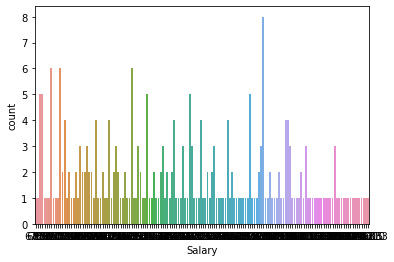

In [198]:
sns.countplot(x="Salary", data=df)
plt.show()

In [199]:
100*df["Salary"].value_counts()/len(df)

750.00    2.48
100.00    1.86
250.00    1.86
90.00     1.86
700.00    1.55
          ... 
490.00    0.31
1861.46   0.31
595.00    0.31
1220.00   0.31
960.00    0.31
Name: Salary, Length: 150, dtype: float64

In [200]:
#histogramlarını inceleyelim
def plot_numerical_col(dataframe,numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)

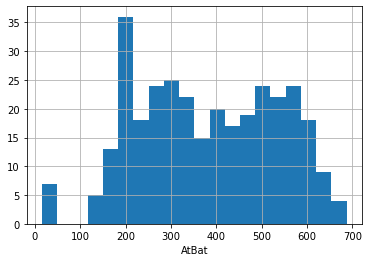

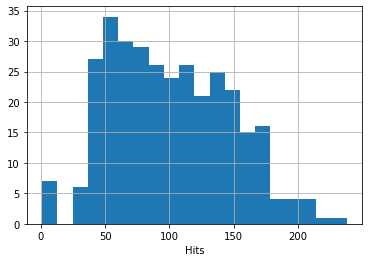

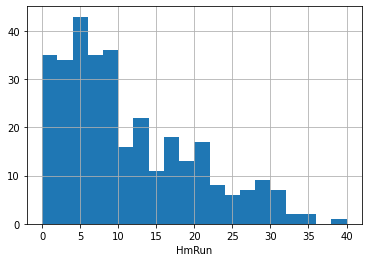

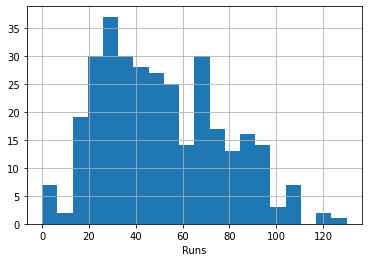

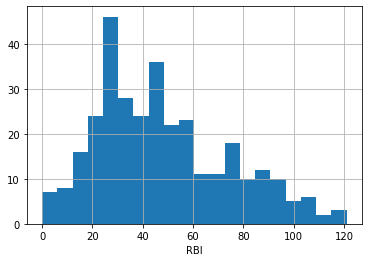

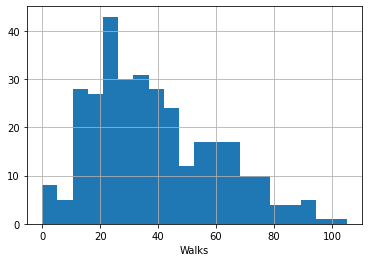

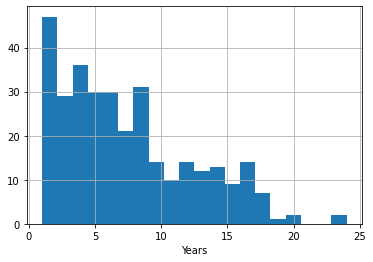

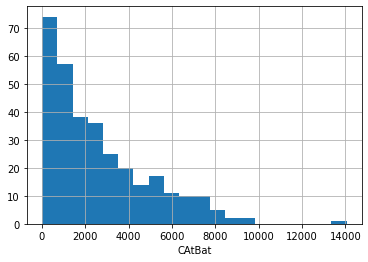

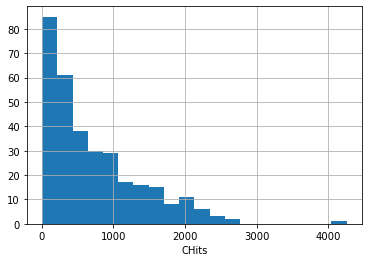

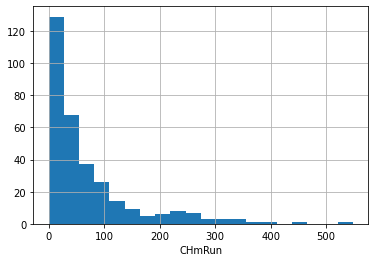

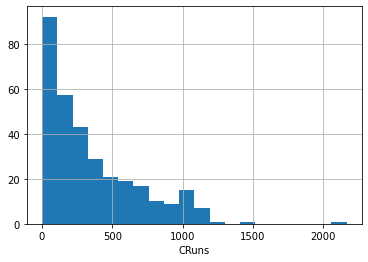

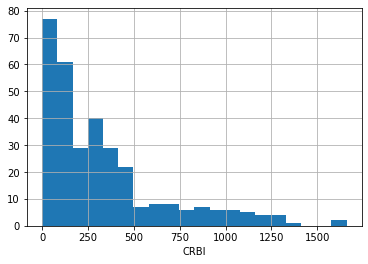

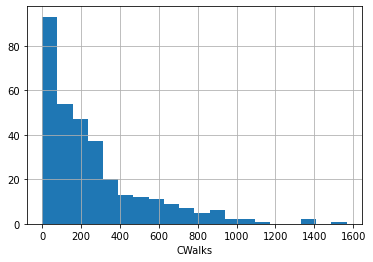

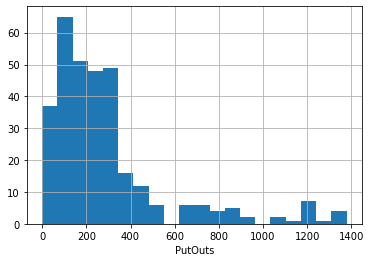

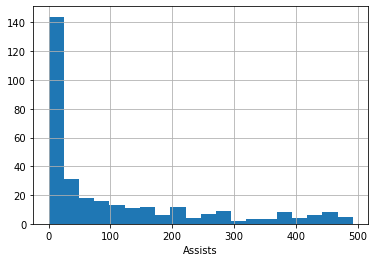

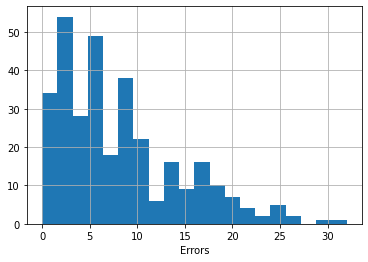

In [201]:
for col in num_cols:
    plot_numerical_col(df,col)

In [203]:
#Data Preprocessing

In [204]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [205]:
def grab_col_names(dataframe, cat_th=10,car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes=="O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique()<cat_th and dataframe[col].dtypes!="O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique()>cat_th and dataframe[col].dtypes=="O"]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    #num cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes!="O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [206]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [207]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [208]:
for col in num_cols:
    print(check_outlier(df,col))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [209]:
#Değişkenleri scale edelim. Algoritma açısından verilerin birbirine üstün gelmesini önlemiş oluyoruz.

In [210]:
#Part 2 
#Feature Engineering

In [211]:
num_cols = [col for col in num_cols if "Salary" not in col]

In [212]:
scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [213]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-0.34,-0.41,-0.58,-0.46,-0.41,-0.68,-0.71,-0.53,-0.52,-0.48,-0.51,-0.57,-0.58,A,E,1.08,-0.04,1.75,NaN,A
1,-0.25,-0.21,-0.08,-0.62,-0.16,0.13,1.14,0.49,0.38,0.41,0.17,0.57,0.75,N,W,1.95,0.02,0.50,475.00,N
2,0.39,0.47,0.83,0.46,0.76,1.32,-0.43,-0.10,-0.06,0.34,-0.05,0.13,0.34,A,W,3.10,0.27,1.00,480.00,A
3,0.45,0.62,1.00,0.44,0.93,0.06,0.71,1.19,1.25,2.47,1.36,1.83,0.67,N,E,-0.06,-0.18,-0.38,500.00,N
4,-0.23,-0.12,0.17,-0.23,-0.05,-0.16,-0.57,-0.49,-0.48,-0.34,-0.47,-0.52,-0.51,N,E,2.75,0.00,-0.25,91.50,N


In [214]:
#Eksik değer analizi 
df.isnull().sum()

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)

        n_miss  ratio
Salary      59  18.32


In [215]:
df["Salary"].fillna(df["Salary"].median(),inplace=True)

In [216]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [218]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-0.34,-0.41,-0.58,-0.46,-0.41,-0.68,-0.71,-0.53,-0.52,-0.48,-0.51,-0.57,-0.58,A,E,1.08,-0.04,1.75,425.00,A
1,-0.25,-0.21,-0.08,-0.62,-0.16,0.13,1.14,0.49,0.38,0.41,0.17,0.57,0.75,N,W,1.95,0.02,0.50,475.00,N
2,0.39,0.47,0.83,0.46,0.76,1.32,-0.43,-0.10,-0.06,0.34,-0.05,0.13,0.34,A,W,3.10,0.27,1.00,480.00,A
3,0.45,0.62,1.00,0.44,0.93,0.06,0.71,1.19,1.25,2.47,1.36,1.83,0.67,N,E,-0.06,-0.18,-0.38,500.00,N
4,-0.23,-0.12,0.17,-0.23,-0.05,-0.16,-0.57,-0.49,-0.48,-0.34,-0.47,-0.52,-0.51,N,E,2.75,0.00,-0.25,91.50,N


In [351]:
#HmRun ile RBI arasında lineer bir ilişki var bunu yeni bir özellik olarak ekleyebiliriz.
df["NewRun"] = df["HmRun"] * df["RBI"]
#ATBat ile Hits arasında da aynı şekilde.
df["NewHit"] = df["AtBat"] * df["Hits"]

In [352]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,NewRun,NewHit
0,-0.34,-0.41,-0.58,-0.46,-0.41,-0.68,-0.71,-0.53,-0.52,-0.48,...,-0.58,A,E,1.08,-0.04,1.75,425.00,A,0.24,0.14
1,-0.25,-0.21,-0.08,-0.62,-0.16,0.13,1.14,0.49,0.38,0.41,...,0.75,N,W,1.95,0.02,0.50,475.00,N,0.01,0.05
2,0.39,0.47,0.83,0.46,0.76,1.32,-0.43,-0.10,-0.06,0.34,...,0.34,A,W,3.10,0.27,1.00,480.00,A,0.63,0.18
3,0.45,0.62,1.00,0.44,0.93,0.06,0.71,1.19,1.25,2.47,...,0.67,N,E,-0.06,-0.18,-0.38,500.00,N,0.93,0.28
4,-0.23,-0.12,0.17,-0.23,-0.05,-0.16,-0.57,-0.49,-0.48,-0.34,...,-0.51,N,E,2.75,0.00,-0.25,91.50,N,-0.01,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.46,0.42,-0.08,0.44,0.11,0.06,-0.14,0.25,0.35,-0.07,...,-0.12,N,E,0.52,-0.19,-0.38,700.00,N,-0.01,0.19
318,0.44,0.55,-0.25,0.72,0.16,1.90,0.86,1.15,1.18,0.02,...,2.59,A,E,0.47,2.15,1.75,875.00,A,-0.04,0.24
319,0.37,0.41,-0.42,0.34,-0.03,0.55,0.00,-0.07,-0.09,-0.40,...,-0.09,A,W,-0.81,0.46,0.12,385.00,A,0.01,0.15
320,0.75,0.66,0.08,0.95,0.44,1.39,0.29,0.41,0.41,0.78,...,0.59,A,E,5.11,0.58,0.75,960.00,A,0.04,0.50


In [420]:
#Model Tuning
X = df.drop(["Salary","League","Division","NewLeague","CHmRun"],axis=1)
y = df[["Salary"]]

In [421]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

reg_model = LinearRegression().fit(X_train, y_train)

In [422]:
# sabit (b - bias)
reg_model.intercept_

array([346.98113345])

In [423]:
# coefficients (w - weights)
reg_model.coef_

array([[-192.48056166,  169.55480501,   -0.62136694, -111.80189327,
          45.29034098,  224.33529396,  -25.26301494, -348.86112592,
         333.73900323,  277.464653  ,  111.63032209, -177.80562509,
           7.74850619,   58.17352463,  -17.31830313,    1.80645111,
         155.20514734]])

In [424]:
y_pred = reg_model.predict(X_test)

In [425]:
y_pred.mean()

525.75457148861

In [426]:
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

283.7840443813113

In [427]:
# TRAIN RKARE
reg_model.score(X_train, y_train)

0.41267462216640804

In [428]:
# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

380.26772361916176

In [429]:
# Test RKARE
reg_model.score(X_test, y_test)

0.492068593696929

In [430]:
# 10 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="neg_mean_squared_error")))

326.5997268842149

In [431]:
random_user = X.sample(1,random_state=45)

In [432]:
random_user

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,NewRun,NewHit
239,-0.27,-0.33,-0.67,-0.39,-0.35,-0.29,-0.14,-0.51,-0.50,-0.48,-0.56,-0.53,-0.44,1.44,0.75,0.24,0.09


In [442]:
reg_model.predict(random_user)[0][0]

299.6738628967979